In [ ]:
!pip install pymysql
!pip install tensorflow
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import pymysql
import numpy as np
from numpy.ma.core import negative
from gensim.models import FastText
from keras.preprocessing.text import Tokenizer
import pickle
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import models
from tensorflow import keras
import tensorflow as tf
from keras import models
import numpy as np
from keras.layers import Dense, Flatten, Conv1D, GlobalMaxPooling1D, Embedding, Dropout, MaxPooling1D
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
NO_JONGSUNG = 'ᴕ'

CHOSUNGS = ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 
            'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
JOONGSUNGS = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 
              'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']
JONGSUNGS = [NO_JONGSUNG,  'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 
             'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']

N_CHOSUNGS = 19
N_JOONGSUNGS = 21
N_JONGSUNGS = 28

FIRST_HANGUL = 0xAC00 #'가'
LAST_HANGUL = 0xD7A3 #'힣'

def to_jamo(s):        
    result = []
    for c in s:
        if ord(c) < FIRST_HANGUL or ord(c) > LAST_HANGUL: # if a character is a hangul
            result.append(c)
        else:            
            code = ord(c) - FIRST_HANGUL
            jongsung_index = code % N_JONGSUNGS
            code //= N_JONGSUNGS
            joongsung_index = code % N_JOONGSUNGS
            code //= N_JOONGSUNGS
            chosung_index = code

            result.append(CHOSUNGS[chosung_index])
            result.append(JOONGSUNGS[joongsung_index])
            result.append(JONGSUNGS[jongsung_index])
    
    return ''.join(result) 

def bunhae(s):
    return [to_jamo(i) for i in s]

def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 {} 이하인 샘플의 비율: {}'.format(max_len, (cnt / len(nested_list))*100))

def sentiment_predict(new_sentence):
#     new_sentence = bunhae(new_sentence) # 토큰화 result1
    new_sentence = list("".join(bunhae(new_sentence)))
    encoded0 = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded0, maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    if(score > 0.5):
        print("{:.2f}% 확률로 부정 문장입니다.\n".format(score * 100))
    else:    
        print("{:.2f}% 확률로 긍정 문장입니다.\n".format((1 - score) * 100))



[['ㅇㅣᴕ', 'ㄱㅓᴕ', ' ', 'ㅈㅣㄴ', 'ㅉㅏᴕ', ' ', 'ㅂㅕㅇ', 'ㅅㅣㄴ', 'ㄱㅏㅌ', 'ㄴㅔᴕ', '\xa0', '[', '2', ']'], ['ㅅㅔᴕ', 'ㅊㅔᴕ', 'ㄱㅕㄴ', ' ', 'ㅍㅔᴕ', 'ㅇㅣᴕ', 'ㅋㅓㄹ']]
[['ㅇㅣᴕㄱㅓᴕ ㅈㅣㄴㅉㅏᴕ ㅂㅕㅇㅅㅣㄴㄱㅏㅌㄴㅔᴕ\xa0[2]'], ['ㅅㅔᴕㅊㅔᴕㄱㅕㄴ ㅍㅔᴕㅇㅣᴕㅋㅓㄹ']]
[['ㅇ', 'ㅣ', 'ᴕ', 'ㄱ', 'ㅓ', 'ᴕ', ' ', 'ㅈ', 'ㅣ', 'ㄴ', 'ㅉ', 'ㅏ', 'ᴕ', ' ', 'ㅂ', 'ㅕ', 'ㅇ', 'ㅅ', 'ㅣ', 'ㄴ', 'ㄱ', 'ㅏ', 'ㅌ', 'ㄴ', 'ㅔ', 'ᴕ', '\xa0', '[', '2', ']'], ['ㅅ', 'ㅔ', 'ᴕ', 'ㅊ', 'ㅔ', 'ᴕ', 'ㄱ', 'ㅕ', 'ㄴ', ' ', 'ㅍ', 'ㅔ', 'ᴕ', 'ㅇ', 'ㅣ', 'ᴕ', 'ㅋ', 'ㅓ', 'ㄹ']]
리뷰의 최대 길이 : 354
리뷰의 평균 길이 : 44.14233666572797


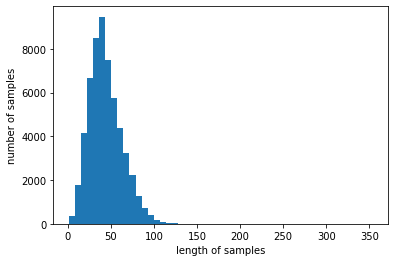

전체 샘플 중 길이가 100 이하인 샘플의 비율: 99.3962968177978


In [ ]:
con=pymysql.connect(host='121.134.135.223',
                    user='study',
                    password='hellobee1234',
                    db='data',
                    charset='utf8')
cur = con.cursor()

sql="SELECT * FROM dataset"
cur.execute(sql)
rows = cur.fetchall()
con.close()
df=pd.DataFrame(rows)
df.columns=['records','label']
df=df.dropna(how='any')
df.drop_duplicates(subset=['records'], inplace=True)

result1=[]
for i in range(len(df)):
    result1.append(bunhae(df.iloc[i,0]))
print(result1[:2])

result2=[]
for i in range(len(df)):
    result2.append(bunhae(["".join(df.iloc[i,0])]))
print(result2[:2])

result3=[]
for i in range(len(df)):
    result3.append(list(result2[i][0]))
print(result3[:2])
embedding = FastText(result3,size=100,window=7,negative=3,min_count=5)
embedding.save('fasttext.model')
tokenizer = Tokenizer()
tokenizer.fit_on_texts(result3)

word2idx = tokenizer.word_index
idx2word = {value : key for key, value in word2idx.items()}
encoded = tokenizer.texts_to_sequences(result3)
with open('jamocnn.pkl', 'wb') as f:
	pickle.dump(tokenizer, f, protocol=pickle.HIGHEST_PROTOCOL)

vocab_size = len(word2idx) + 1 
print('리뷰의 최대 길이 :',max(len(l) for l in encoded))
print('리뷰의 평균 길이 :',sum(map(len, encoded))/len(encoded))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

max_len = 100
below_threshold_len(max_len, encoded)
encoded = pad_sequences(encoded, maxlen = max_len)
encoded = np.asarray(encoded).astype('float32')
X_train, X_valid, y_train, y_valid = train_test_split(encoded, df['label'], test_size=0.2, random_state=123)

In [ ]:
embedding_dim = 64 
dropout_ratio = 0.5 
num_filters = 500
kernel_size = 10 

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size,padding='same', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(dropout_ratio))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_acc', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2, callbacks=[es, mc])
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/best_model.h5')
print("테스트 정확도: {:.4f}".format(loaded_model.evaluate(X_valid, y_valid)[1]))


Epoch 1/100
285/285 [==============================] - ETA: 0s - loss: 0.4591 - acc: 0.7786
Epoch 1: val_acc improved from -inf to 0.85425, saving model to best_model.h5
285/285 [==============================] - 7s 14ms/step - loss: 0.4591 - acc: 0.7786 - val_loss: 0.3520 - val_acc: 0.8543
Epoch 2/100
284/285 [============================>.] - ETA: 0s - loss: 0.3142 - acc: 0.8725
Epoch 2: val_acc improved from 0.85425 to 0.88934, saving model to best_model.h5
285/285 [==============================] - 3s 11ms/step - loss: 0.3141 - acc: 0.8725 - val_loss: 0.2764 - val_acc: 0.8893
Epoch 3/100
280/285 [============================>.] - ETA: 0s - loss: 0.2789 - acc: 0.8895
Epoch 3: val_acc improved from 0.88934 to 0.90298, saving model to best_model.h5
285/285 [==============================] - 3s 11ms/step - loss: 0.2787 - acc: 0.8894 - val_loss: 0.2443 - val_acc: 0.9030
Epoch 4/100
284/285 [============================>.] - ETA: 0s - loss: 0.2595 - acc: 0.8980
Epoch 4: val_acc did not i

In [ ]:
sentiment_predict('병4신')

79.68% 확률로 긍정 문장입니다.

